# Projeto Prático 1

## Redes Neurais - 2020

#### Elaborado por: Carlos Diego Ferreira, João Victor de Oliveira e Luiz Carlos Silva

## Análise exploratória e Visualização de Dados

In [68]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

### Uma breve contextualização do dataset

## Abrir dataset em formato csv usando pandas

In [69]:
df = pd.read_csv('../config/dataset_covid_manaus.csv', sep = ';', encoding='latin-1') 
df.head()

,_idade,_faixa etária,_sexo,_bairro,_classificacao,_comorb_renal,_comorb_diabetes,_comorb_imuno,_comorb_cardio,_conclusao,...,_distrito,_bairro_mapa,_comorb_respiratoria,_comorb_cromossomica,_comorb_hepatica,_comorb_neurologica,_comorb_hemato,_comorb_obessidade,_origem,_evolução
0,37.0,30a - 39a,F,CONJ. CIDADAO 10,Confirmado,Não,Não,Não,Não,NaN,...,OESTE,TARUMÃ,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN
1,46.0,40a - 49a,F,MORADA DO SOL,Descartado,Não,Não,Não,Não,Recuperado,...,SUL,ALEIXO,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN
2,51.0,50a - 59a,F,NaN,Confirmado,Não,Não,Não,Não,NaN,...,NaN,NaN,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN
3,74.0,70a - 79a,M,NaN,Confirmado,Não,Não,Não,Não,NaN,...,NaN,NaN,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN
4,51.0,50a - 59a,F,ALEIXO,Confirmado,Não,Não,Não,Não,NaN,...,SUL,ALEIXO,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN


## De acordo com o indicado na descrição do projeto, serão mantidos apenas os casos confirmados

In [70]:
df = df[df['_classificacao'] == 'Confirmado'].reset_index(drop=True) #nesse caso foram descartados os casos 'Descartado' e 'Em análise'
df.head()

,_idade,_faixa etária,_sexo,_bairro,_classificacao,_comorb_renal,_comorb_diabetes,_comorb_imuno,_comorb_cardio,_conclusao,...,_distrito,_bairro_mapa,_comorb_respiratoria,_comorb_cromossomica,_comorb_hepatica,_comorb_neurologica,_comorb_hemato,_comorb_obessidade,_origem,_evolução
0,37.0,30a - 39a,F,CONJ. CIDADAO 10,Confirmado,Não,Não,Não,Não,NaN,...,OESTE,TARUMÃ,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN
1,51.0,50a - 59a,F,NaN,Confirmado,Não,Não,Não,Não,NaN,...,NaN,NaN,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN
2,74.0,70a - 79a,M,NaN,Confirmado,Não,Não,Não,Não,NaN,...,NaN,NaN,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN
3,51.0,50a - 59a,F,ALEIXO,Confirmado,Não,Não,Não,Não,NaN,...,SUL,ALEIXO,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN
4,53.0,50a - 59a,M,PARQUE10,Confirmado,Não,Não,Não,Não,NaN,...,SUL,PARQUE 10 DE NOVEMBRO,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN


## Descrição do conteúdo do dataset

#### 1 - Quantos e quais atributos descrevem cada elemento do dataset?

In [71]:
print('Quantidade de atributos preditores: '+str(len(df.columns)))
print('São eles:')
for c in df.columns:
#     print(c[1:]) #para melhor visualização, retirei o '_' presente na primeira posição de todos os atributos
    print(c) #para visualizá-los com seus nomes originais

Quantidade de atributos preditores: 36
São eles:
_idade
_faixa etária
_sexo
_bairro
_classificacao
_comorb_renal
_comorb_diabetes
_comorb_imuno
_comorb_cardio
_conclusao
_dt_notificacao
_taxa
_dt_evolucao
_raca
_dt_sintomas
_criterio
_tipo_teste
_sintoma_garganta
_sintoma_dispneia
_sintoma_febre
_sintoma_tosse
_sintoma_outros
_etnia
_profiss_saude
_srag
_se_notificacao
_distrito
_bairro_mapa
_comorb_respiratoria
_comorb_cromossomica
_comorb_hepatica
_comorb_neurologica
_comorb_hemato
_comorb_obessidade
_origem
_evolução


#### 2 - Quantos casos confirmados há em Manaus?

In [72]:
#Considerando que apenas os casos confirmados encontram-se no dataset, trata-se apenas do tamanho deste, no entanto, 
#caso fosse uma requisição de outro aributo que tivesse mais de uma opção, seria da seguinte forma:
df['_classificacao'].value_counts()['Confirmado']

36947

#### 3 - Qual o período de tempo do dataset (baseando-se na data de notificação)?

In [73]:
df['_dt_notificacao'] = pd.to_datetime(df['_dt_notificacao'].dropna().astype(str), format='%d/%m/%Y')
datetime_dates = df['_dt_notificacao']
first = np.min(datetime_dates)
latest = np.max(datetime_dates)

In [74]:
print('Primeira notificação foi em: %s/%s/%4d' %(first.strftime('%d'), first.strftime('%m'), first.year))
print('Notificação mais recente(retirado no dia 06/08/2020) foi em: %s/%s/%4d' %(latest.strftime('%d'), latest.strftime('%m'), latest.year))

Primeira notificação foi em: 30/01/2020
Notificação mais recente(retirado no dia 06/08/2020) foi em: 06/08/2020


### Conforme especificado no pdf do projeto:
"Para fins da análise considerada no escopo deste projeto, vamos excluir todos os atributos relativos
às comorbidades, sintomas, etnia, profissão, outras datas que não a de notificação, origem e outros
que não estiverem envolvidos no contexto do trabalho solicitado. Estes atributos serão considerados
irrelevantes para fins de simplificação."

### E ainda:
"Exclua todas as linhas em que houver dados faltantes para os
atributos remanescentes."

In [75]:
#removendo os atributos especificados:
df = df.drop(['_comorb_renal', '_comorb_diabetes', '_comorb_imuno', '_comorb_cardio', '_taxa', '_dt_evolucao', '_raca',
       '_dt_sintomas', '_sintoma_garganta', '_classificacao',
       '_sintoma_dispneia', '_sintoma_febre', '_sintoma_tosse',
       '_sintoma_outros', '_etnia', '_profiss_saude', '_srag', '_criterio', 
       '_se_notificacao', '_distrito', '_bairro_mapa', '_comorb_respiratoria',
       '_comorb_cromossomica', '_comorb_hepatica', '_comorb_neurologica',
       '_comorb_hemato', '_comorb_obessidade', '_origem', '_evolução'], axis=1).dropna()

## Análise dos Dados

#### 1 - Quantos exemplos e atributos há na base de dados após a limpeza e organização?

In [76]:
print('Quantidade de exemplos: ' + str(len(df)))
print('Quantidade de atributos preditores após limpeza e organização: ' + str(len(df.columns)))
print('São eles:')
for i in df.columns:
    print(i)

Quantidade de exemplos: 6422
Quantidade de atributos preditores após limpeza e organização: 7
São eles:
_idade
_faixa etária
_sexo
_bairro
_conclusao
_dt_notificacao
_tipo_teste


#### 2 - Qual a porcentagem de indivíduos recuperados em relação ao todo?

In [77]:
recovered_percentage = (df['_conclusao'].value_counts()['Recuperado'] / len(df))*100
print('Porcentagem de recuperados em relação ao todo: %.2f ' % recovered_percentage + '%\n')

Porcentagem de recuperados em relação ao todo: 99.80 %



#### 3 - Os casos acometeram mais indivíduos do sexo masculino ou feminino?

In [78]:
print('Quantidade de casos em relação ao sexo do paciente:')
print(df['_sexo'].value_counts())
print('\nOs casos acometeram mais indivíduos do sexo feminino')

Quantidade de casos em relação ao sexo do paciente:
F    3645
M    2777
Name: _sexo, dtype: int64

Os casos acometeram mais indivíduos do sexo feminino


#### 4 - Qual a média e desvio padrão de idade dos indivíduos que contraíram COVID-19? Qual o indivíduo mais jovem e o mais idoso a contraírem tal enfermidade?

In [79]:
average_age = df['_idade'].sum() / len(df)
print('Idade média dos indivíduos que contraíram COVID-19 : ' + str(int(average_age)) + ' anos\n')

temp = 0
for age in df.iloc[:,0].values:
    temp += (age - average_age)**2
    
std_deviation = (temp/len(df))**(1/2)

print('Desvio padrão: %.3f' % std_deviation + '\n')
print('Indivíduo mais jovem possui: ' + str(np.min(df.iloc[:,0].values)))
print('Indivíduo mais velho possui: ' + str(np.max(df.iloc[:,0].values)))
print('\n')

Idade média dos indivíduos que contraíram COVID-19 : 41 anos

Desvio padrão: 14.155

Indivíduo mais jovem possui: 0.0
Indivíduo mais velho possui: 99.0




#### 5 - Qual bairro com mais incidência de casos?

In [80]:
dts = df['_bairro'].value_counts(sort = True).index.tolist()
dts_cases = df['_bairro'].value_counts(sort = True).values
print((dts[0]).capitalize() + ' é o bairro com a maior incidência de COVID-19, com ' + str(dts_cases[0]) + ' casos.\n')

Cidade nova é o bairro com a maior incidência de COVID-19, com 301 casos.



#### 6 - Quais os três bairros com maior incidência de casos recuperados?

In [81]:
print("Os 3 bairros com a maior incidência de casos recuperados:")
df_recovereds = df[df['_conclusao'] == 'Recuperado']
dts_recovereds = df_recovereds['_bairro'].value_counts(sort = True).index.tolist()
dts_recoverds_cases = df_recovereds['_bairro'].value_counts(sort = True).values

for i in range(3):
    print(str(i+1) + 'º '+ dts_recovereds[i] + ', ' + str(dts_recoverds_cases[i]) + ' recuperados.')
print('\n')

Os 3 bairros com a maior incidência de casos recuperados:
1º CIDADE NOVA, 301 recuperados.
2º FLORES, 266 recuperados.
3º TARUMA, 225 recuperados.




#### 7 - Quais os tipos de testes efetuados, segundo os dados? Indique os dados de maneira quantitativa e percentual.

In [82]:
test_types = df['_tipo_teste'].value_counts(sort = True).index.tolist()
tests_qtd = df['_tipo_teste'].value_counts(sort = True).values

tests_percentage = []
for value in tests_qtd:
    tests_percentage.append(((value / len(df))*100))

tests_table = {'Tipo': test_types, 'Testes realizados': tests_qtd, 'Percentual em relação ao total (%)': tests_percentage}
pd.DataFrame(tests_table)

,Tipo,Testes realizados,Percentual em relação ao total (%)
0,TESTE RÁPIDO - ANTICORPO,3736,58.175023
1,RT-PCR,1537,23.933354
2,TESTE RÁPIDO - ANTÍGENO,1139,17.735908
3,ELISA IgM,6,0.093429
4,ECLIA IgG,4,0.062286


#### 8 - Qual a taxa de letalidade pode ser calculada a partir do conjunto de dados?

In [83]:
qtd_mortos = df['_conclusao'].value_counts()['Óbito']
total_infc = len(df)

print(f'Quantidade total de infectados: {qtd_mortos}\n'
      f'Quantidade total de mortos: {total_infc}\n',
       'Taxa de letalidade: %.2f%%' %(qtd_mortos/total_infc * 100))

Quantidade total de infectados: 13
Quantidade total de mortos: 6422
 Taxa de letalidade: 0.20%


#### 9 - Qual o tipo de relação, mediante o coeficiente de correlação de Pearson, entre a idade e o número de casos?

In [84]:
age_cases = df.groupby(['_idade']).count()

In [85]:
age_case_corr = pd.DataFrame(data=np.array([age_cases.index, age_cases.values.transpose()[0]]).transpose(), columns=['idade', 'casos'])

In [86]:
age_case_corr['idade'].corr(age_case_corr['casos'])

-0.2258984278924331

In [87]:
# O resultado é um valor negativo próximo de zero.
# Isso demonstra que as variáveis possuem uma leve relação inversamente proporcional.

# Visualização de Dados

#### 1 - Construa um histograma denotando a quantidade de casos nos 10 bairros em que houve mais casos registrados.

In [88]:
neigh_cases = pd.Series(df.groupby('_bairro').count()['_idade'], name='top10_casos_bairro')
neigh_cases.sort_values(ascending=False).head(10)

_bairro
CIDADE NOVA          301
FLORES               266
TARUMA               225
PETROPOLIS           193
ALEIXO               172
NOVO ALEIXO          170
JORGE TEIXEIRA       169
SAO JOSE OPERARIO    169
COROADO              168
COMPENSA             166
Name: top10_casos_bairro, dtype: int64

In [89]:
top10_casos_bairro = list(neigh_cases.sort_values(ascending=False).head(10))
print(top10_casos_bairro)

[301, 266, 225, 193, 172, 170, 169, 169, 168, 166]


In [90]:
sigla_bairros = ['Cidade Nova', 'Flores', 'Tarumã', 'Petropolis', 'Aleixo', 'Novo Aleixo', 'Jorge \nTeixeira', 'São Jorge \nOperário', 'Coroado', 'Compensa', 'Outros']

In [91]:
others = np.sum(neigh_cases.sort_values(ascending=False).tail(496))
print(others)

4423


In [92]:
top10_casos_bairro.append(others)
print(top10_casos_bairro)

[301, 266, 225, 193, 172, 170, 169, 169, 168, 166, 4423]


In [93]:
total = sum(top10_casos_bairro)
print(total)

6422


Text(0, 0.5, '% de Casos')

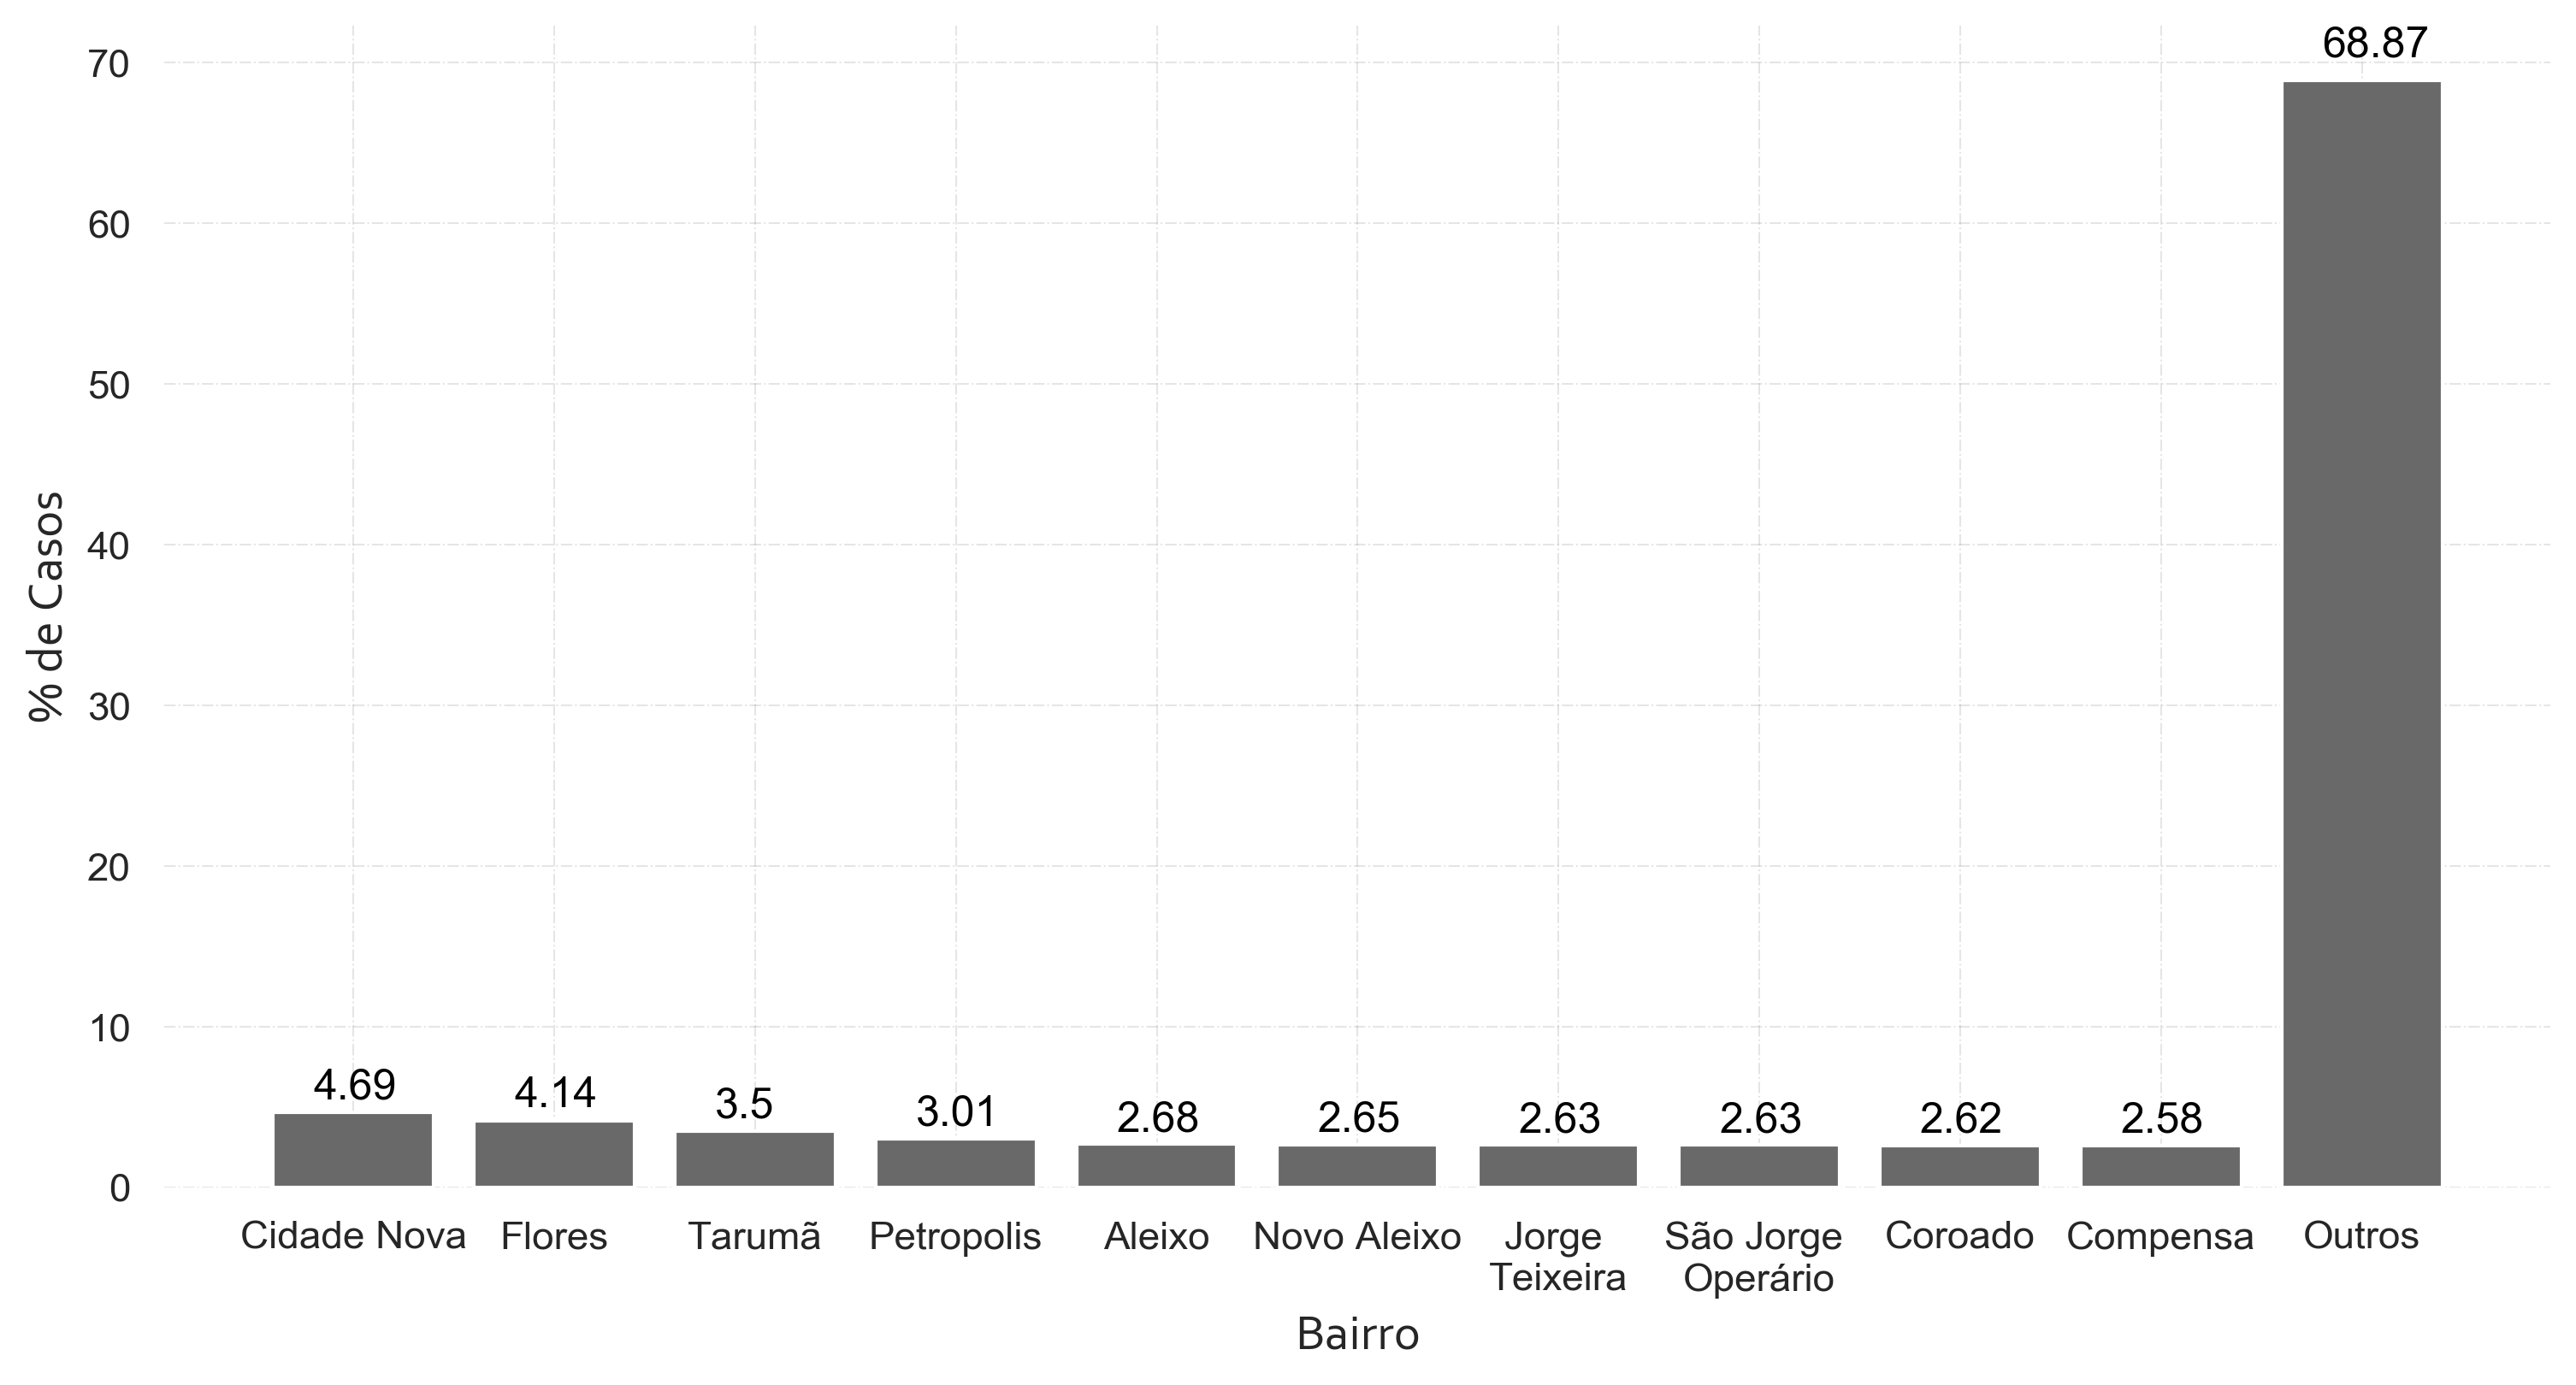

In [94]:
fig, ax = plt.subplots(figsize =(12, 6), dpi=300.0)
font = {'fontname':'Corbel'}

ax.bar(sigla_bairros, [x/total * 100 for x in top10_casos_bairro], color='dimgray')

for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 
    
# Add x, y gridlines 
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2) 

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_x() + 0.20, i.get_width() + i.get_height()*1.01,
             str(round(i.get_height(), 2)), 
             fontsize = 12, fontweight ='normal', 
             color = 'black')
    
ax.set_xlabel("Bairro", fontsize=14, **font)
ax.set_ylabel("% de Casos", fontsize=14, **font)
#ax.set_title("Distribuição de Casos Confirmados por Bairro", fontsize=14, **font)

#### 2 - Denote, por sexo, o boxplot da idade dos casos confirmados. Há outliers?

In [95]:
male_age = df[df._sexo == 'M'][['_idade']]
fale_age = df[df._sexo == 'F'][['_idade']]

In [96]:
male_age = male_age.values.flatten()
fale_age = fale_age.values.flatten()

In [97]:
data = np.concatenate((male_age, fale_age))

{'whiskers': [<matplotlib.lines.Line2D at 0x15e9e723dc8>,
 'caps': [<matplotlib.lines.Line2D at 0x15e9e723f48>,
 'boxes': [<matplotlib.lines.Line2D at 0x15e9e723688>,
 'medians': [<matplotlib.lines.Line2D at 0x15e9e727f48>,
 'fliers': [<matplotlib.lines.Line2D at 0x15e9e727fc8>,
 'means': []}

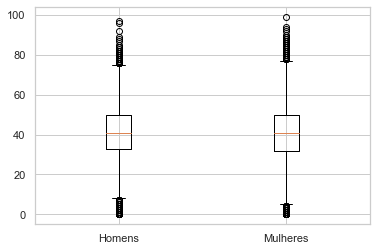

In [98]:
plt.boxplot((male_age, fale_age), sym="o", labels=["Homens", "Mulheres"])

#### 3 - Denote em um gráfico de barras o número de novos casos por dia, considerando os 10 últimos dias existentes na base de dados.

In [99]:
cases_per_day = df.drop(columns=['_idade', '_sexo', '_bairro', '_conclusao', '_tipo_teste'])

In [100]:
cases_per_day['_dt_notificacao'] = pd.to_datetime(cases_per_day['_dt_notificacao'], dayfirst=True)

In [101]:
cases_per_day_sorted = cases_per_day.sort_values(by='_dt_notificacao')

In [102]:
days_group = cases_per_day_sorted.groupby('_dt_notificacao').count()

In [103]:
days_group.tail(20)

,_faixa etária
_dt_notificacao,
2020-06-22,87
2020-06-23,45
2020-06-24,45
2020-06-25,71
2020-06-26,54
2020-06-27,4
2020-06-28,6
2020-06-29,83
2020-06-30,89


In [134]:
bar_days = days_group.tail(10).values
bar_days = bar_days.flatten()
#bar_days = np.delete(bar_days, [i for i in range(10,15)])
bar_days = list(bar_days)
print(bar_days)

[38, 29, 6, 9, 32, 1, 1, 2, 1, 1]


In [135]:
days = ['2020-07-02', '2020-07-03', '2020-07-04', '2020-07-05', '2020-07-06', '2020-07-16', '2020-07-20', '2020-07-24', '2020-07-30', '2020-07-31']

Text(0, 0.5, 'Data')

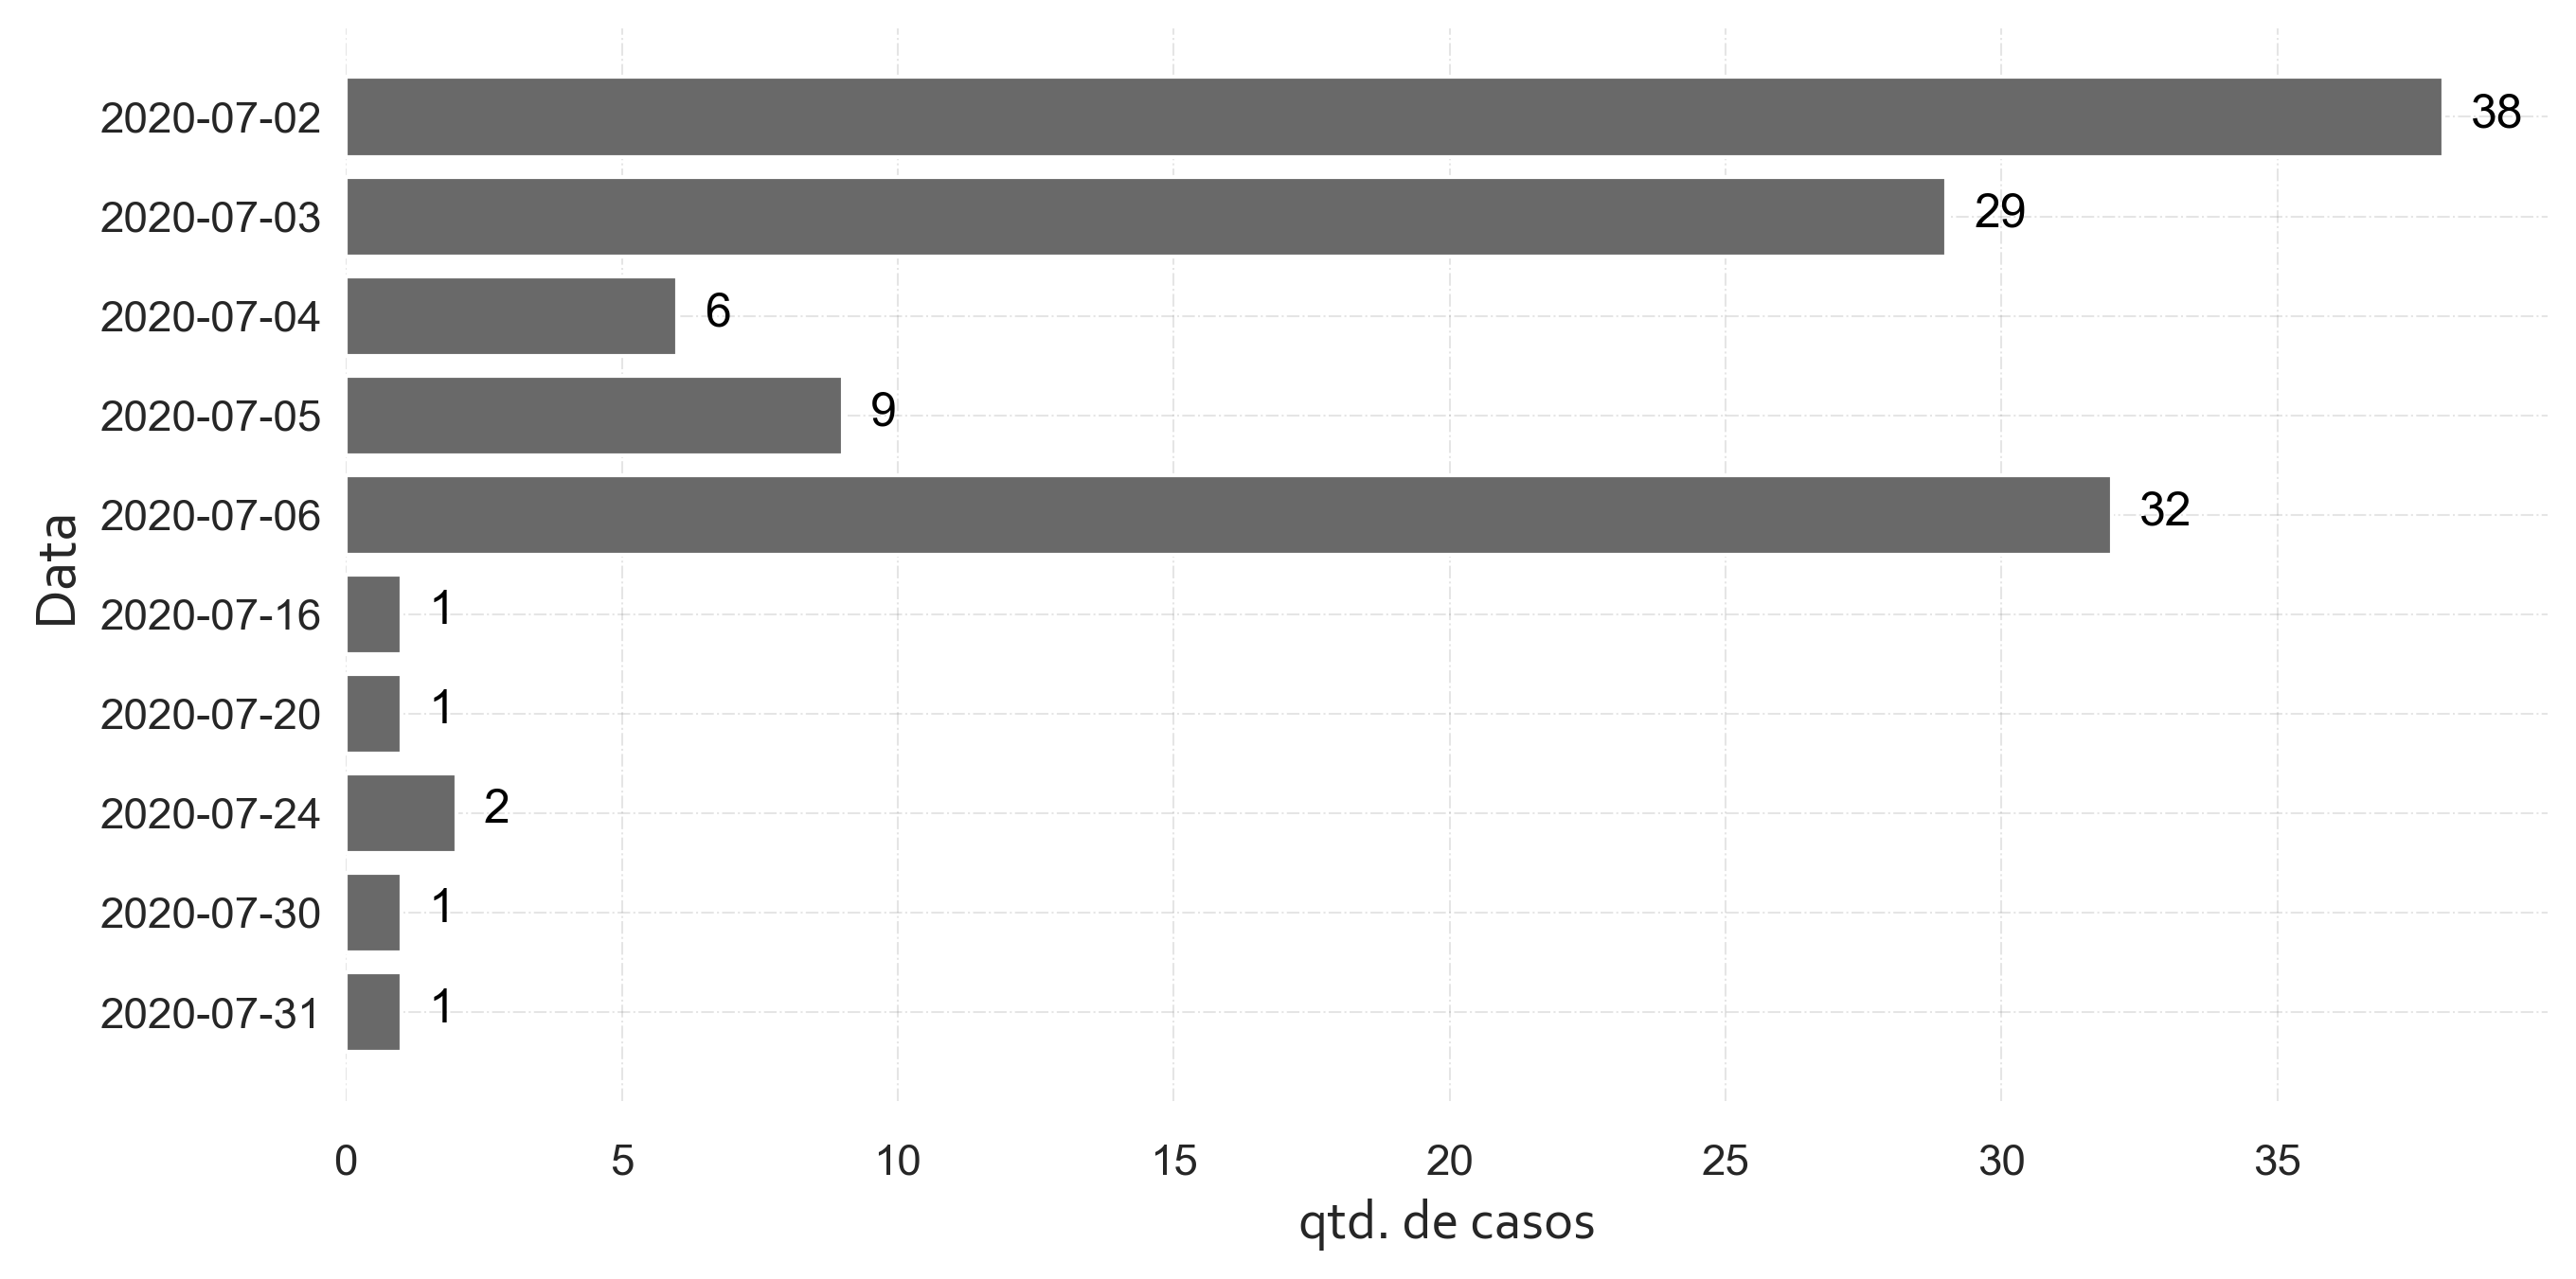

In [137]:
y_axis = days 
x_axis = bar_days
  
# Figure Size 
fig, ax = plt.subplots(figsize =(10, 5), dpi=300.0) 
  
# Horizontal Bar Plot 
ax.barh(y_axis, x_axis, color='dimgray') 
  
# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 

# Remove y ticks
ax.yaxis.set_ticks_position('none') 
  
# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 0) 
  
# Add x, y gridlines 
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2) 
  
# Show at middle
ax.invert_yaxis() 
  
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.5, i.get_y()+0.5,  
             str(i.get_width()), 
             fontsize = 12, fontweight ='normal', 
             color = 'black') 
    
# Add Plot Title 
font = {'fontname':'Corbel'}
#ax.set_title('Quantidade de novos casos por dia', fontsize=18, loc ='center', **font) 
ax.set_xlabel('qtd. de casos', fontsize=14, **font)
ax.set_ylabel('Data', fontsize=15, **font)

#### 4 - Repita o gráfico anterior considerando o número de casos recuperado.

In [107]:
rec_per_day = df.drop(columns=['_idade', '_sexo', '_bairro', '_tipo_teste', '_faixa etária'])

In [108]:
rec_per_day['_dt_notificacao'] = pd.to_datetime(rec_per_day['_dt_notificacao'], dayfirst=True)

In [109]:
rec_per_day_sorted = rec_per_day.sort_values(by='_dt_notificacao')

In [139]:
day_rec_group = rec_per_day_sorted[rec_per_day_sorted._conclusao == 'Recuperado'].groupby('_dt_notificacao').count()
day_rec_group.tail(10)

,_conclusao
_dt_notificacao,
2020-06-27,4
2020-06-28,6
2020-06-29,83
2020-06-30,89
2020-07-01,45
2020-07-02,38
2020-07-03,29
2020-07-04,6
2020-07-05,9


In [140]:
aux = list(day_rec_group.tail(10).values.flatten())
print(aux)

[4, 6, 83, 89, 45, 38, 29, 6, 9, 32]


In [143]:
days_rec = ['2020-06-27', '2020-06-28', '2020-06-29', '2020-06-30', '2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04', '2020-07-05', '2020-07-06']

Text(0, 0.5, 'Data')

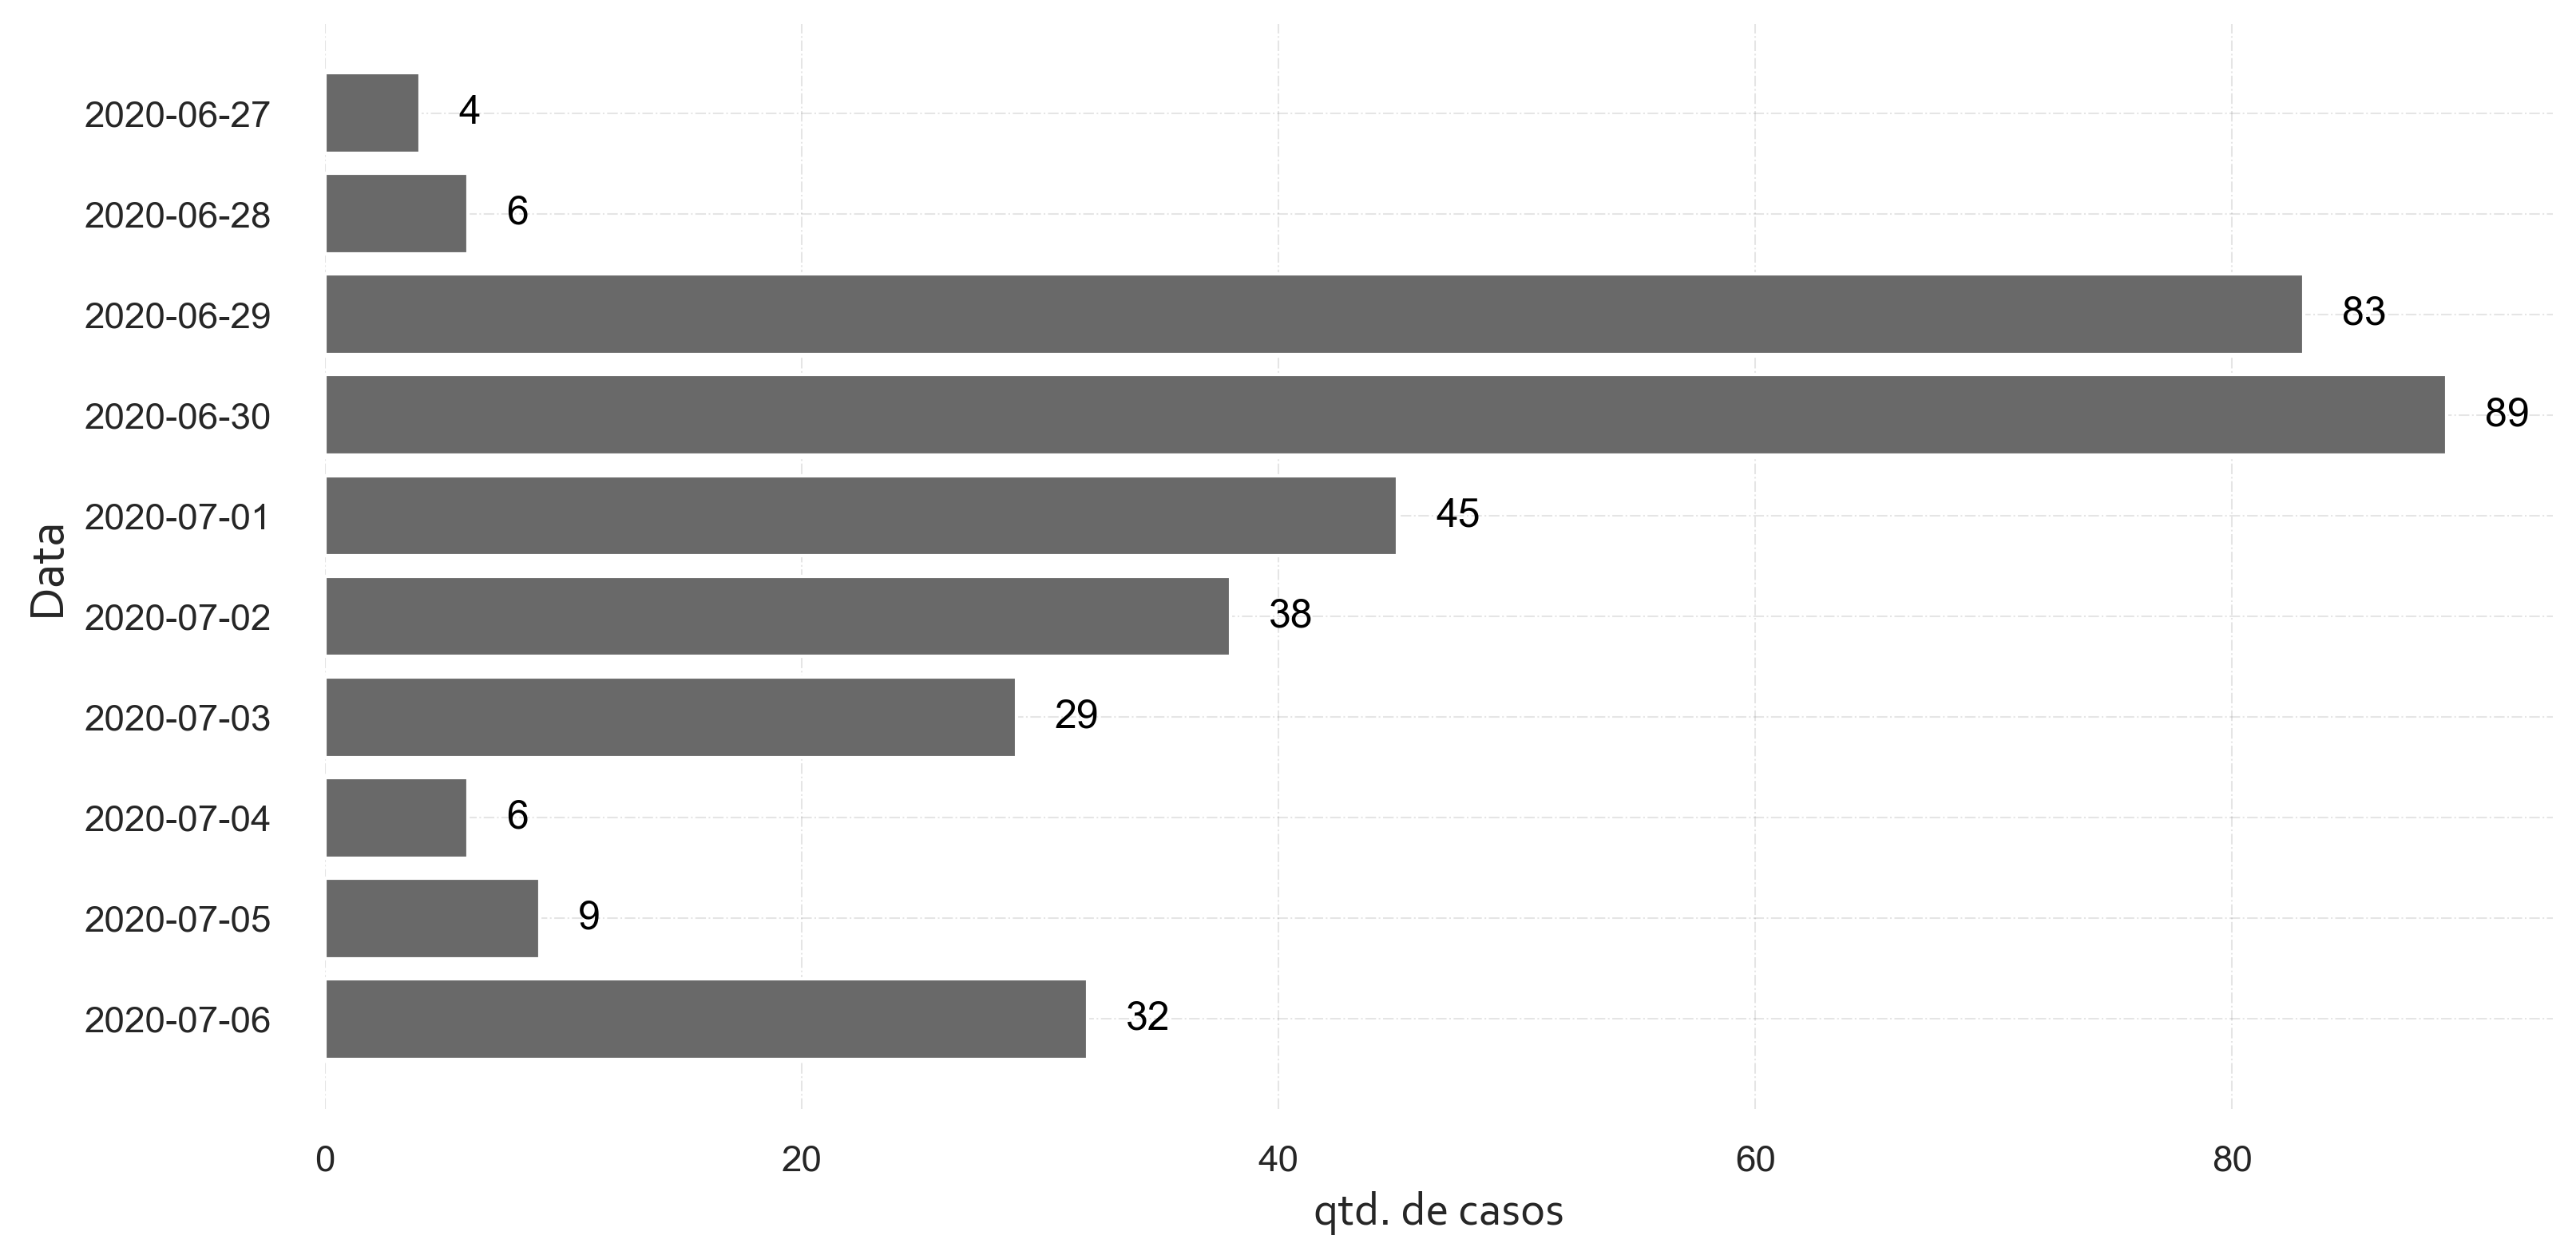

In [144]:
y_axis = days_rec 
x_axis = aux
  
# Figure Size 
fig, ax = plt.subplots(figsize =(12, 6), dpi=300) 
  
# Horizontal Bar Plot 
ax.barh(y_axis, x_axis, color='dimgray') 
  
# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 

# Remove y ticks
ax.yaxis.set_ticks_position('none') 
  
# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2) 
  
# Show at middle
ax.invert_yaxis() 
  
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+1.6, i.get_y()+0.5,  
             str(i.get_width()), 
             fontsize = 12, fontweight ='normal', 
             color = 'black') 
    
# Add Plot Title
font = {'fontname':'Corbel'}
#ax.set_title('Quantidade de casos recuperados por dia', fontsize=18, loc ='center', **font) 
ax.set_xlabel('qtd. de casos', fontsize=14, **font)
ax.set_ylabel('Data', fontsize=15, **font)

#### 5 - Construa um histograma que denote a quantidade percentual de casos por grupo etário, considerando que cada grupo contempla uma década (0 a 10 anos, 11 a 20 anos, etc.).

In [113]:
#primeiramente, separar os dados por faixa etária:
def identify_age_range(elem):
    age_group_i = -1
    age_range = np.arange(1, np.max(df['_idade'])+10, 10)
    age_range[0] = 0
    aux = age_range - elem
    for index, n in enumerate(aux):
        if n > 0:
            age_group_i = index - 1
            break
    return age_group_i
str_age_range = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-99']



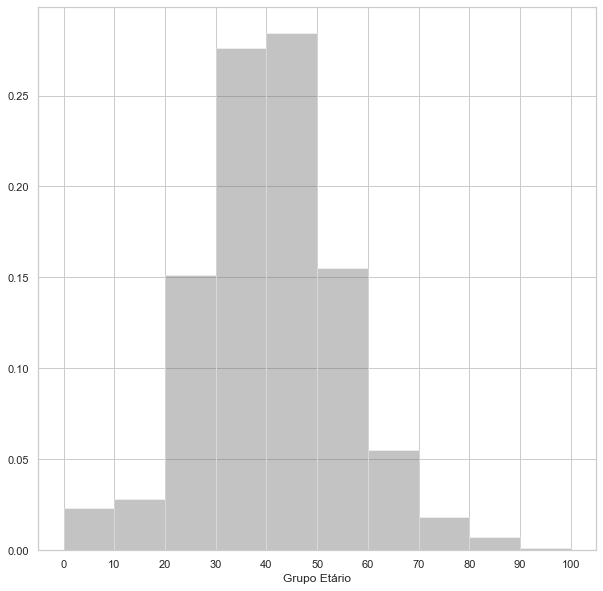

In [114]:
#Em seguida elaborar o histograma
sns.set(style="whitegrid")
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
k = sns.distplot(df['_idade'].apply(identify_age_range).reset_index(drop=True), kde=False, ax=ax, norm_hist=True, bins = np.arange(11), axlabel='Grupo Etário', color='dimgray')
k.set_xticks(np.arange(0, 11))
_ = k.set_xticklabels(np.arange(0, 101, 10)) 

#### 6. Elabore um gráfico que mostra o cumulativo de casos notificados ao longo do tempo;

Text(0.5, 0, 'Data de Notificação')

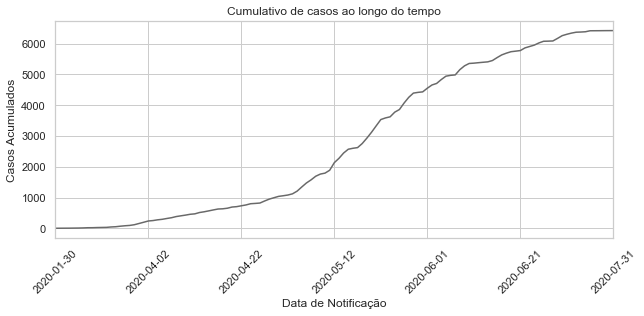

In [115]:
#primeiramente, calular os casos acumulados a cada dia do dataset
dt_notif_df = df['_dt_notificacao'].value_counts(sort=False).sort_index(ascending=True).reset_index()
dt_notif_df.columns = ['Data_notificação', 'Casos Acumulados']
dt_notif_df['Data_notificação'] = dt_notif_df['Data_notificação'].apply(lambda x: x.strftime('%Y-%m-%d'))
pre_df = {}
acum = dt_notif_df['Casos Acumulados'][0]
pred_df = {dt_notif_df['Data_notificação'][0]: acum}
for case in dt_notif_df[1:].iterrows():
    acum += case[1]['Casos Acumulados']
    pred_df[case[1]['Data_notificação']] = acum
#em seguida plottar o gráfico
pd.DataFrame(pred_df.values(), index = pred_df.keys()).plot(figsize=(10, 4), 
                                                            legend=False, 
                                                            color='dimgray',
                                                            title="Cumulativo de casos ao longo do tempo")
_ = plt.xticks(rotation=45)
plt.ylabel('Casos Acumulados')
plt.xlabel('Data de Notificação')

#### 7. Faça um gráfico do tipo scatterplot que denote a idade versus o número total de casos registrado para aquela idade. Aproveite o processamento efetuado para o cálculo da correlação. É possível observar alguma tendência?

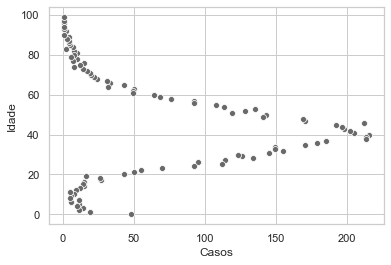

In [116]:
scat_idade = df['_idade'].value_counts().reset_index()
scat_idade.columns = ['Idade', 'Casos']
sns.scatterplot(x=scat_idade['Casos'], y=scat_idade['Idade'], color='dimgray')

In [117]:
correlation = scat_idade.corr()['Casos'][0]
#negativa e fraca(próxima de 0)
#a correlação negativa indica que quanto maior o número de casos, menor a idade, porém não é uma correlação perfeita,
#mostrando um comportamento parabólico, ao invés de linear

In [118]:
import IPython
IPython.display.HTML(url = 'https://censo2010.ibge.gov.br/sinopse/webservice/frm_piramide.php?codigo=130260&corhomem=3d4590&cormulher=9cdbfc')

## Proposições

#### 1 - Uma tarefa de classificação mediante Aprendizado Supervisionado que poderia ser feita com esta base de dados. Qual seria o atributo-alvo? Quais métricas de desempenho poderiam ser aplicadas? Que tipo de validação seria apropriado?

In [119]:
#reanalisar o dataset de forma integral
df = pd.read_csv('../config/dataset_covid_manaus.csv', sep = ';', encoding='latin-1') 
#Foi feita uma conversão das colunas com datas de strings para o objetos timestamps.
df = df[df['_classificacao'] == 'Confirmado']
df.head()

,_idade,_faixa etária,_sexo,_bairro,_classificacao,_comorb_renal,_comorb_diabetes,_comorb_imuno,_comorb_cardio,_conclusao,...,_distrito,_bairro_mapa,_comorb_respiratoria,_comorb_cromossomica,_comorb_hepatica,_comorb_neurologica,_comorb_hemato,_comorb_obessidade,_origem,_evolução
0,37.0,30a - 39a,F,CONJ. CIDADAO 10,Confirmado,Não,Não,Não,Não,NaN,...,OESTE,TARUMÃ,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN
2,51.0,50a - 59a,F,NaN,Confirmado,Não,Não,Não,Não,NaN,...,NaN,NaN,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN
3,74.0,70a - 79a,M,NaN,Confirmado,Não,Não,Não,Não,NaN,...,NaN,NaN,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN
4,51.0,50a - 59a,F,ALEIXO,Confirmado,Não,Não,Não,Não,NaN,...,SUL,ALEIXO,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN
5,53.0,50a - 59a,M,PARQUE10,Confirmado,Não,Não,Não,Não,NaN,...,SUL,PARQUE 10 DE NOVEMBRO,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN


In [120]:
df_class = df[['_idade', '_sintoma_garganta',
       '_sintoma_dispneia', '_sintoma_febre', '_sintoma_tosse',
       '_sintoma_outros', '_evolução']].dropna()
df_class.head()

,_idade,_sintoma_garganta,_sintoma_dispneia,_sintoma_febre,_sintoma_tosse,_sintoma_outros,_evolução
80245,46.0,Sim,Não,Sim,Sim,Sim,Em tratamento domiciliar
80263,1.0,Não,Não,Não,Não,Sim,Em tratamento domiciliar
80271,10.0,Não,Não,Não,Não,Sim,Em tratamento domiciliar
80272,0.0,Não,Não,Não,Não,Sim,Em tratamento domiciliar
80273,0.0,Não,Não,Não,Não,Sim,Em tratamento domiciliar


#### 2 - Uma tarefa de regressão mediante Aprendizado Supervisionado que poderia ser feita com esta base de dados. Qual seria o atributo-alvo? Quais atributos preditores a equipe considera relevantes para o cenário?

#### 3 - Bônus: Qual tarefa de Aprendizado Não-Supervisionado poderia ser concebida neste contexto?

In [121]:
df_unsup = df[['_idade', '_comorb_renal', '_comorb_diabetes', '_comorb_imuno', '_comorb_cardio','_comorb_respiratoria', '_conclusao']].dropna()

In [122]:
X = df_unsup[['_idade', '_comorb_renal', '_comorb_diabetes', '_comorb_imuno', '_comorb_cardio','_comorb_respiratoria']]
Y = df_unsup[['_conclusao']]
X['_comorb_renal'] = pd.Series(np.where(X._comorb_renal.values == 'Sim', 1, 0),
          X.index)
X['_comorb_diabetes'] = pd.Series(np.where(X._comorb_diabetes.values == 'Sim', 1, 0),
          X.index)
X['_comorb_imuno'] = pd.Series(np.where(X._comorb_imuno.values == 'Sim', 1, 0),
          X.index)
X['_comorb_cardio'] = pd.Series(np.where(X._comorb_cardio.values == 'Sim', 1, 0),
          X.index)
X['_comorb_respiratoria'] = pd.Series(np.where(X._comorb_respiratoria.values == 'Sim', 1, 0),
          X.index)
Y['_conclusao'] = pd.Series(np.where(Y._conclusao.values == 'Recuperado', 1, 0),
          X.index)

In [123]:
X.head()

,_idade,_comorb_renal,_comorb_diabetes,_comorb_imuno,_comorb_cardio,_comorb_respiratoria
680,25.0,0,0,0,0,0
681,41.0,0,0,0,0,0
67519,40.0,0,0,0,0,0
67523,50.0,0,0,0,0,0
67540,30.0,0,0,0,0,0


In [124]:
Y.head()

,_conclusao
680,1
681,1
67519,1
67523,1
67540,1
